In [2]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading all datasets as pandas dataframes

hurricane_data = pd.read_csv('BRTK_SHIPS_2000to2019_IMERG_OK_Request_2023_FINAL.csv')
population_data = pd.read_csv('florida-population-2023-07-08.csv')
labor_data = pd.read_csv('labor-productivity-by-state-and-region.csv')

In [4]:
# Failed attempt to filter out all storms that did hit Florida

# all_florida_storms = hurricane_data[hurricane_data['LATITUDE'].all() <= 31.0 and hurricane_data['LONGITUDE'].all() >= -87.0]
# all_florida_storms.head()

In [5]:
# Successful attempt to filter out all storms that did hit Florida

all_florida_storm_indicies = []
for i in range(len(hurricane_data)):
    if(24.5 <= hurricane_data['LATITUDE'][i] <= 31.0 and -79.8 >= hurricane_data['LONGITUDE'][i] >= -87.0):
        all_florida_storm_indicies.append(i)

all_florida_storms = hurricane_data.iloc[all_florida_storm_indicies]
all_florida_storms = all_florida_storms.reset_index(drop=True)

In [20]:
# Listing out all the storms that hit Florida
# ALso listing all major hurricanes that hit Florida
# Also lists out years of major hurricanes that hit Florida

major_hurricane_indicies = []
print(all_florida_storms['STORM_NAME'].unique())
for i in range(len(all_florida_storms)):
    try:
        if(int(all_florida_storms['CAT'][i][1]) >= 3):
            print(all_florida_storms['STORM_NAME'][i])
            major_hurricane_indicies.append(i)
    except ValueError:
        pass
years = [int(str(date)[:4]) for date in all_florida_storms['DATE']]
print(years)
all_florida_storms['YEAR'] = years
major_hurricanes = all_florida_storms.iloc[major_hurricane_indicies]

['GORDON' 'HELENE' 'BARRY' 'GABRIELLE' 'EDOUARD' 'HANNA' 'KYLE'
 'NOT_NAMED' 'ERIKA' 'HENRI' 'BONNIE' 'CHARLEY' 'FRANCES' 'IVAN' 'JEANNE'
 'ARLENE' 'DENNIS' 'KATRINA' 'RITA' 'TAMMY' 'WILMA' 'ALBERTO' 'ERNESTO'
 'FAY' 'GUSTAV' 'IKE' 'CLAUDETTE' 'BERYL' 'DEBBY' 'ISAAC' 'ANDREA' 'COLIN'
 'HERMINE' 'JULIA' 'MATTHEW' 'EMILY' 'IRMA' 'MICHAEL']
CHARLEY
IVAN
DENNIS
DENNIS
DENNIS
DENNIS
KATRINA
KATRINA
KATRINA
RITA
WILMA
GUSTAV
MATTHEW
MATTHEW
IRMA
IRMA
MICHAEL
MICHAEL
MICHAEL
MICHAEL
MICHAEL
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005, 2005, 

In [7]:
storm_intensity = all_florida_storms.loc[:, ('GIS_ID', 'YEAR', 'VMAX')]
print(storm_intensity.head())
ocean_heat_content = all_florida_storms.loc[:, ('GIS_ID', 'YEAR', 'COHC_1')]
print(ocean_heat_content.head())

                     GIS_ID  YEAR  VMAX
0  ATL_200011_C1_2000091700  2000    65
1  ATL_200011_C1_2000091706  2000    70
2  ATL_200011_C1_2000091712  2000    65
3  ATL_200011_C1_2000091718  2000    65
4  ATL_200011_TS_2000091800  2000    60
                     GIS_ID  YEAR  COHC_1
0  ATL_200011_C1_2000091700  2000    55.0
1  ATL_200011_C1_2000091706  2000    86.0
2  ATL_200011_C1_2000091712  2000    92.0
3  ATL_200011_C1_2000091718  2000    61.0
4  ATL_200011_TS_2000091800  2000    41.0
                     GIS_ID  YEAR  SHIPS_POT
0  ATL_200011_C1_2000091700  2000       74.0
1  ATL_200011_C1_2000091706  2000       83.0
2  ATL_200011_C1_2000091712  2000       78.0
3  ATL_200011_C1_2000091718  2000       65.0
4  ATL_200011_TS_2000091800  2000       56.0


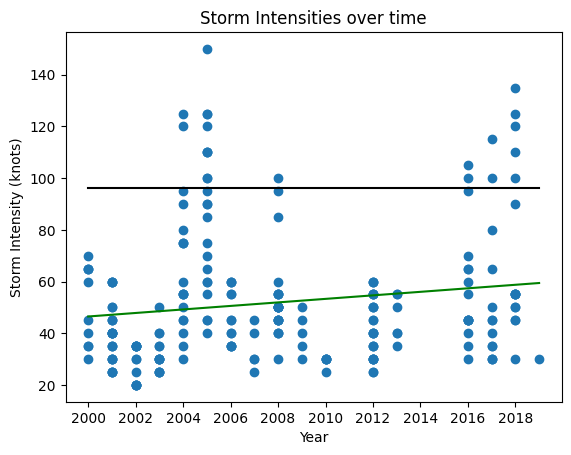

In [17]:
fig, ax = plt.subplots()
plt.scatter(x = storm_intensity['YEAR'], y = storm_intensity['VMAX'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(2000, 2020, 2))
ax.set_xlabel('Year')
ax.set_ylabel('Storm Intensity (knots)')
ax.set_title('Storm Intensities over time')
a, b = np.polyfit(storm_intensity['YEAR'], storm_intensity['VMAX'], 1)
plt.plot(storm_intensity['YEAR'], (a*storm_intensity['YEAR'])+b, color = 'green')
plt.plot(storm_intensity['YEAR'], (0*storm_intensity['YEAR'])+96, color = 'black')
plt.savefig('storm_intensity_over_time.png')
plt.show()

In [14]:
# Removing missing values from ocean heat content data

ocean_heat_content['COHC_1'] = ocean_heat_content['COHC_1'].replace(-999.0, np.nan)
ocean_heat_content = ocean_heat_content.dropna()
ocean_heat_content.head()

,GIS_ID,YEAR,COHC_1
0,ATL_200011_C1_2000091700,2000,55.0
1,ATL_200011_C1_2000091706,2000,86.0
2,ATL_200011_C1_2000091712,2000,92.0
3,ATL_200011_C1_2000091718,2000,61.0
4,ATL_200011_TS_2000091800,2000,41.0


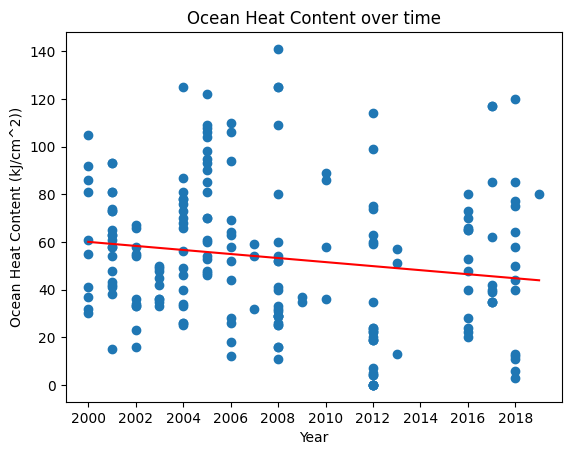

In [15]:
# Plotting climatological ocean heat content over time

fig, ax = plt.subplots()
plt.scatter(x = ocean_heat_content['YEAR'], y = ocean_heat_content['COHC_1'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(2000, 2020, 2))
ax.set_xlabel('Year')
ax.set_ylabel('Ocean Heat Content (kJ/cm^2))')
ax.set_title('Ocean Heat Content over time')
a, b = np.polyfit(ocean_heat_content['YEAR'], ocean_heat_content['COHC_1'], 1)
plt.plot(ocean_heat_content['YEAR'], (a*ocean_heat_content['YEAR'])+b, color = 'red')
plt.savefig('ocean_heat_over_time.png')
plt.show()

In [27]:
# Testing around with the population data because of my failure to use .loc

print(population_data.head())
print(population_data.iloc[:, 0])
print(population_data.iloc[:, 1])

      Date   Population   Annual Change
0  12/1/00       530000             NaN
1  12/1/01       544000            2.64
2  12/1/02       565000            3.86
3  12/1/03       587000            3.89
4  12/1/04       599000            2.04
0      12/1/00
1      12/1/01
2      12/1/02
3      12/1/03
4      12/1/04
        ...   
118    12/1/18
119    12/1/19
120    12/1/20
121    12/1/21
122    12/1/22
Name: Date, Length: 123, dtype: object
0        530000
1        544000
2        565000
3        587000
4        599000
         ...   
118    21254926
119    21492056
120    21589602
121    21828069
122    22244823
Name:  Population, Length: 123, dtype: int64


In [24]:
# Simplify how years are displayed in the population data
# Also filters out all data before 2000

for i in range(len(population_data)):
    population_data.iloc[i, 0] = population_data.iloc[i, 0][-2:]
    if(i < 100):
        pass
    else:
        population_data.iloc[i, 0] = '20' + population_data.iloc[i, 0]
population_data = population_data.iloc[100:, :]
population_data = population_data.reset_index(drop=True)


In [50]:
# Adding colors to the population data for plotting
population_data['Color'] = 'blue'

for year in np.unique(np.array(major_hurricanes['YEAR'])):
    population_data.iloc[year - 2000, 3]= 'red'
    print(population_data[population_data['Date'] == str(year)].loc[:, 'Color'])

4    red
Name: Color, dtype: object
5    red
Name: Color, dtype: object
8    red
Name: Color, dtype: object
16    red
Name: Color, dtype: object
17    red
Name: Color, dtype: object
18    red
Name: Color, dtype: object


In [51]:
# Verification of population data contents

print(population_data)

    Date   Population   Annual Change Color
0   2000     16047515            6.20  blue
1   2001     16356966            1.93  blue
2   2002     16689370            2.03  blue
3   2003     17004085            1.89  blue
4   2004     17415318            2.42   red
5   2005     17842038            2.45   red
6   2006     18166990            1.82  blue
7   2007     18367842            1.11  blue
8   2008     18527305            0.87   red
9   2009     18652644            0.68  blue
10  2010     18846143            1.04  blue
11  2011     19055607            1.11  blue
12  2012     19302016            1.29  blue
13  2013     19551678            1.29  blue
14  2014     19853880            1.55  blue
15  2015     20219111            1.84  blue
16  2016     20627237            2.02   red
17  2017     20977089            1.70   red
18  2018     21254926            1.32   red
19  2019     21492056            1.12  blue
20  2020     21589602            0.45  blue
21  2021     21828069           

/var/folders/94/g9q138r57c77g58pkrfmdwbm0000gp/T/ipykernel_47296/3720213667.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = population_data.iloc[:, 0], fontsize = 6)


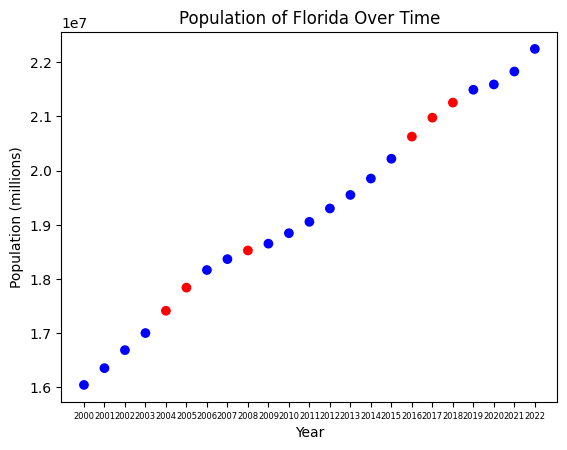

In [52]:
# Plotting population data over year

fig, ax = plt.subplots()
plt.scatter(x = population_data.iloc[:, 0], y = population_data.iloc[:, 1], c = population_data.iloc[:, 3])
start, end = ax.get_xlim()
# start, end = 0, 128
# ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.set_xticklabels(labels = population_data.iloc[:, 0], fontsize = 6)
plt.title('Population of Florida Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
plt.savefig('FL_population_over_time.png')
plt.show()

In [54]:
# Getting all the labor data for Florida only

florida_labor_data = labor_data[labor_data['Area'] == 'Florida']

In [55]:
# Selecting all of the data for actual number of labor hours

florida_labor_data = florida_labor_data.reset_index(drop=True)
working_hours = florida_labor_data[florida_labor_data['Units'] == 'Millions of hours']
working_hours = working_hours.reset_index(drop=True)
working_hours.head()

,Sector,Area,Basis,Measure,Units,Year,Value
0,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2007,"13,266.371"
1,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2008,"12,526.034"
2,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2009,"11,631.709"
3,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2010,"11,606.950"
4,Private nonfarm,Florida,All workers,Hours worked,Millions of hours,2011,"11,611.617"


In [56]:
# Changing all of the values in the 'Value' column to floats from strings

working_hours = working_hours[working_hours['Measure'] == 'Hours worked']
for i in range(len(working_hours.iloc[:, 6])):
    working_hours.iloc[i, 6] = working_hours.iloc[i, 6].replace(',', '')
working_hours.iloc[:, 6] = working_hours.iloc[:, 6].astype(float)

In [60]:
# Adding colors to the working hours data for plotting
working_hours['Color'] = 'blue'

for year in np.unique(np.array(major_hurricanes['YEAR'])):
    working_hours.iloc[year - 2007, 7]= 'red'
    print(working_hours.iloc[year - 2007, 7])

red
red
red
red
red
red


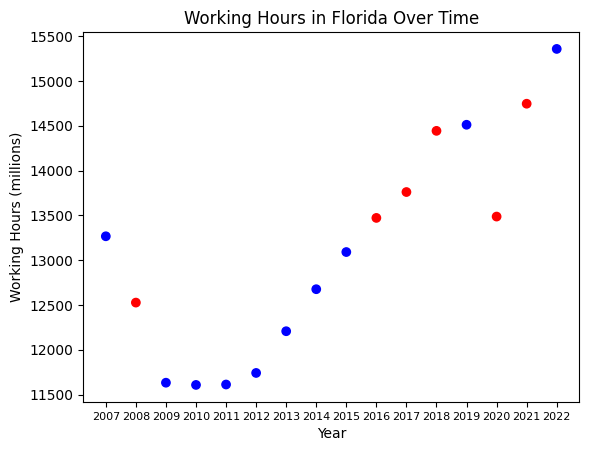

In [61]:
# Plot of working hours in Florida over time

fig, ax = plt.subplots()
plt.scatter(x = working_hours.iloc[:, 5], y = working_hours.iloc[:, 6], c = working_hours.iloc[:, 7])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(2007, end, 1))
ax.xaxis.set_ticklabels(labels = working_hours.iloc[:, 5], fontsize = 8)
plt.title('Working Hours in Florida Over Time')
plt.xlabel('Year')
plt.ylabel('Working Hours (millions)')
plt.savefig('FL_working_hours_over_time.png')
plt.show()

# Report begins below